In [5]:
import numpy as np #numerical operations
import pandas as pd #data manipulation
import tensorflow as tf #building and training neural networks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

import matplotlib.pyplot as plt # data visualization

In [2]:
df = pd.read_csv('dataset.csv') #pandas DataFrame

In [3]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Epoch 1/20
2280/2280 [==============================] - 7s 2ms/step - loss: 534.3970 - root_mean_squared_error: 23.1170 - val_loss: 481.9251 - val_root_mean_squared_error: 21.9528
Epoch 2/20
2280/2280 [==============================] - 7s 3ms/step - loss: 477.7105 - root_mean_squared_error: 21.8566 - val_loss: 473.0752 - val_root_mean_squared_error: 21.7503
Epoch 3/20
2280/2280 [==============================] - 5s 2ms/step - loss: 468.1490 - root_mean_squared_error: 21.6368 - val_loss: 464.6570 - val_root_mean_squared_error: 21.5559
Epoch 4/20
2280/2280 [==============================] - 6s 3ms/step - loss: 459.7992 - root_mean_squared_error: 21.4429 - val_loss: 460.8190 - val_root_mean_squared_error: 21.4667
Epoch 5/20
2280/2280 [==============================] - 5s 2ms/step - loss: 455.5176 - root_mean_squared_error: 21.3429 - val_loss: 456.4669 - val_root_mean_squared_error: 21.3651
Epoch 6/20
2280/2280 [==============================] - 9s 4ms/step - loss: 452.0866 - root_mean_squ

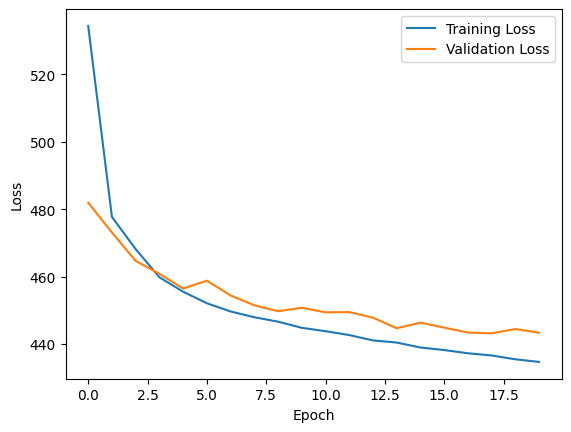

713/713 [==============================] - 2s 2ms/step - loss: 438.1605 - root_mean_squared_error: 20.9323
Test RMSE: 20.932283401489258


In [7]:
# code by Sydnie : compile simple Neural Network architecture

df_numeric = df.select_dtypes(include=[np.number]) # focus numeric data types

# set target variables

X = df_numeric.drop('popularity', axis=1)  # features (axix drop 1)
y = df_numeric['popularity']  # target

# split dataset into train and test sets : 80/20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # rand. ensures reproducibility (same code = same result)

# standardize the features

scaler = StandardScaler() # remove mean and scale unit variance
X_train_scaled = scaler.fit_transform(X_train) # standardize training
X_test_scaled = scaler.transform(X_test) # standarize testing

# define neural network architecture with Keras Sequential API (linear layers)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # neurons 64, 32, 1 for experiment
    Dense(32, activation='relu'), # ReLU function returns x if positive, else 0
    Dense(1)  # output layer without activation for regression task
])

# compile

model.compile(optimizer='adam', # root Mean Square Propagation & momentum for acceleration
              loss='mean_squared_error',  # regression task, functions to predict continuous value (average of squared differences between predicted values and actual values)
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # evaluate performance for regression

# train with Keras fit() method : adjust parameters (weights and biases) repeatedly to minimize loss
# epochs = trains 20 times back n forth
# batch size =  32 samples processed before parameters are updated
# validation = 20% data reserved for validation. 80% for training.

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

#Code by Nicky : visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# evaluate model on test set
test_loss, test_rmse = model.evaluate(X_test_scaled, y_test)
print('Test RMSE:', test_rmse) # RMSE = performance metric

In [8]:
# code by Sydnie : evaluate baseline model for root mean squared error

# assess baseline model performance on test set
# create array of zeros to input data for evaluation (placeholder)

baseline_test_rmse = model.evaluate(np.zeros_like(X_test_scaled), y_test, verbose=0)[-1]
# y_test = target , verbose=0 = 0 output , model.eval = return list of metrics , [-1] = last item in list (RMSE)

print('Baseline RMSE:', baseline_test_rmse)

Baseline RMSE: 22.534894943237305


In [9]:
#Code by Nicky

#Model I: Improve baseline model by working on model architecture
#Define and compile a more complex Neural Network architecture
#Adding more layers, changing activation functions, adjusting dropout rates.

#Define neural network architecture for regression task
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  #Output layer without activation for regression task
])

#Compile improved model
model_improved.compile(optimizer='adam',
                       loss='mean_squared_error',  # For regression task
                       metrics=[tf.keras.metrics.RootMeanSquaredError()])

#Train improved model
history_improved = model_improved.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

#Evaluate improved model on test set
test_loss_improved, test_rmse_improved = model_improved.evaluate(X_test_scaled, y_test)
print('Improved model Test RMSE:', test_rmse_improved)

Epoch 1/30
2280/2280 [==============================] - 19s 7ms/step - loss: 506.7009 - root_mean_squared_error: 22.5100 - val_loss: 467.0609 - val_root_mean_squared_error: 21.6116
Epoch 2/30
2280/2280 [==============================] - 7s 3ms/step - loss: 460.9518 - root_mean_squared_error: 21.4698 - val_loss: 455.3654 - val_root_mean_squared_error: 21.3393
Epoch 3/30
2280/2280 [==============================] - 6s 3ms/step - loss: 452.5410 - root_mean_squared_error: 21.2730 - val_loss: 460.2247 - val_root_mean_squared_error: 21.4528
Epoch 4/30
2280/2280 [==============================] - 7s 3ms/step - loss: 447.3340 - root_mean_squared_error: 21.1503 - val_loss: 446.8144 - val_root_mean_squared_error: 21.1380
Epoch 5/30
2280/2280 [==============================] - 8s 3ms/step - loss: 442.6945 - root_mean_squared_error: 21.0403 - val_loss: 446.7920 - val_root_mean_squared_error: 21.1375
Epoch 6/30
2280/2280 [==============================] - 13s 6ms/step - loss: 439.5261 - root_mean_s

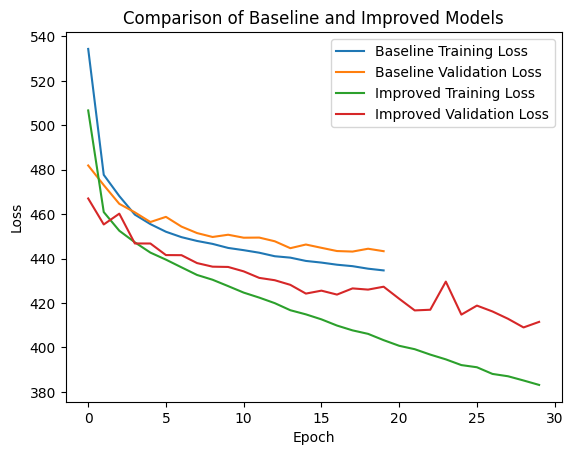

Baseline Model Test RMSE: 20.932283401489258
Improved Model Test RMSE: 20.211973190307617


In [12]:
# plot loss history for baseline model
plt.plot(history.history['loss'], label='Baseline Training Loss')
plt.plot(history.history['val_loss'], label='Baseline Validation Loss')

# plot loss history for improved model
plt.plot(history_improved.history['loss'], label='Improved Training Loss')
plt.plot(history_improved.history['val_loss'], label='Improved Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of Baseline and Improved Models')
plt.legend()
plt.show()

# original baseline model results
print('Baseline Model Test RMSE:', test_rmse)

# improved model results
print('Improved Model Test RMSE:', test_rmse_improved)